In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [35]:
from sklearn.preprocessing import StandardScaler

In [2]:
train = pd.read_csv("train.csv", index_col="id")
test = pd.read_csv("test.csv", index_col="id")
train.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
id,,,,,,,,,,,,,,
0,58,1,4,152,239,0,0,158,1,3.6,2,2,7,Presence
1,52,1,1,125,325,0,2,171,0,0.0,1,0,3,Absence
2,56,0,2,160,188,0,2,151,0,0.0,1,0,3,Absence
3,44,0,3,134,229,0,2,150,0,1.0,2,0,3,Absence
4,58,1,4,140,234,0,2,125,1,3.8,2,3,3,Presence


In [3]:
train.describe().T[["count","mean","50%","std","min","max"]].round({"mean":3,"std":3})

,count,mean,50%,std,min,max
Age,630000.0,54.137,54.0,8.256,29.0,77.0
Sex,630000.0,0.715,1.0,0.452,0.0,1.0
Chest pain type,630000.0,3.313,4.0,0.852,1.0,4.0
BP,630000.0,130.497,130.0,14.976,94.0,200.0
Cholesterol,630000.0,245.012,243.0,33.682,126.0,564.0
FBS over 120,630000.0,0.080,0.0,0.271,0.0,1.0
EKG results,630000.0,0.982,0.0,0.999,0.0,2.0
Max HR,630000.0,152.817,157.0,19.113,71.0,202.0
Exercise angina,630000.0,0.274,0.0,0.446,0.0,1.0
ST depression,630000.0,0.716,0.1,0.948,0.0,6.2


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 630000 entries, 0 to 629999
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Age                      630000 non-null  int64  
 1   Sex                      630000 non-null  int64  
 2   Chest pain type          630000 non-null  int64  
 3   BP                       630000 non-null  int64  
 4   Cholesterol              630000 non-null  int64  
 5   FBS over 120             630000 non-null  int64  
 6   EKG results              630000 non-null  int64  
 7   Max HR                   630000 non-null  int64  
 8   Exercise angina          630000 non-null  int64  
 9   ST depression            630000 non-null  float64
 10  Slope of ST              630000 non-null  int64  
 11  Number of vessels fluro  630000 non-null  int64  
 12  Thallium                 630000 non-null  int64  
 13  Heart Disease            630000 non-null  object 
dtypes: float6

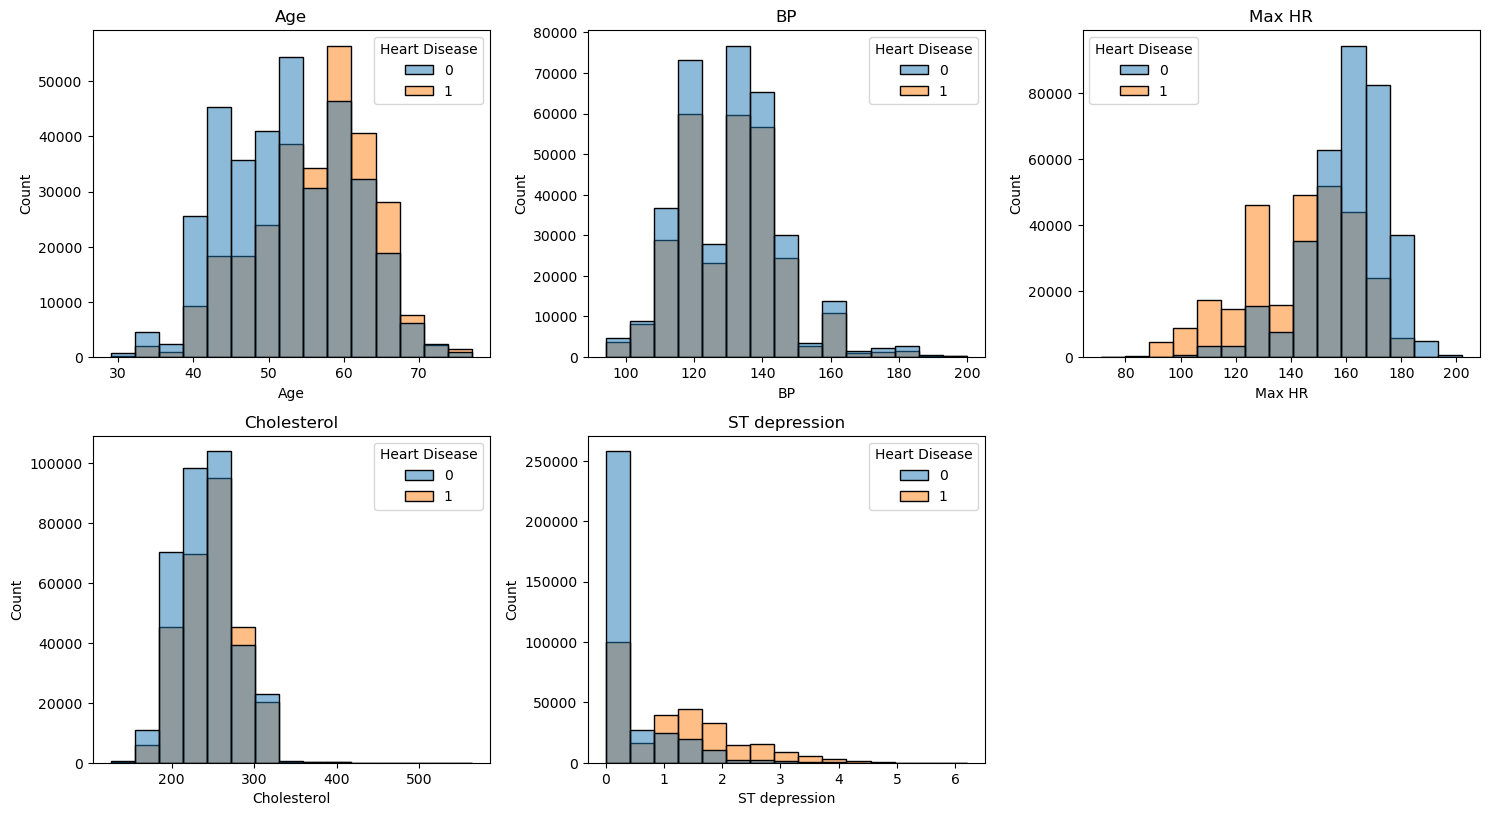

<Figure size 640x480 with 0 Axes>

In [14]:
X_columns = ["Age","BP","Max HR","Cholesterol","ST depression"]

rows, cols = 5, 3
plt.figure(figsize=(15, 20))

for i, col in enumerate(X_columns[:rows*cols]):
    plt.subplot(rows, cols, i + 1)
    sns.histplot(
        data=train,
        x=col,
        hue="Heart Disease",
        bins=15
    )
    plt.title(col)

plt.tight_layout()
plt.show()
plt.savefig("hist_plot.png")

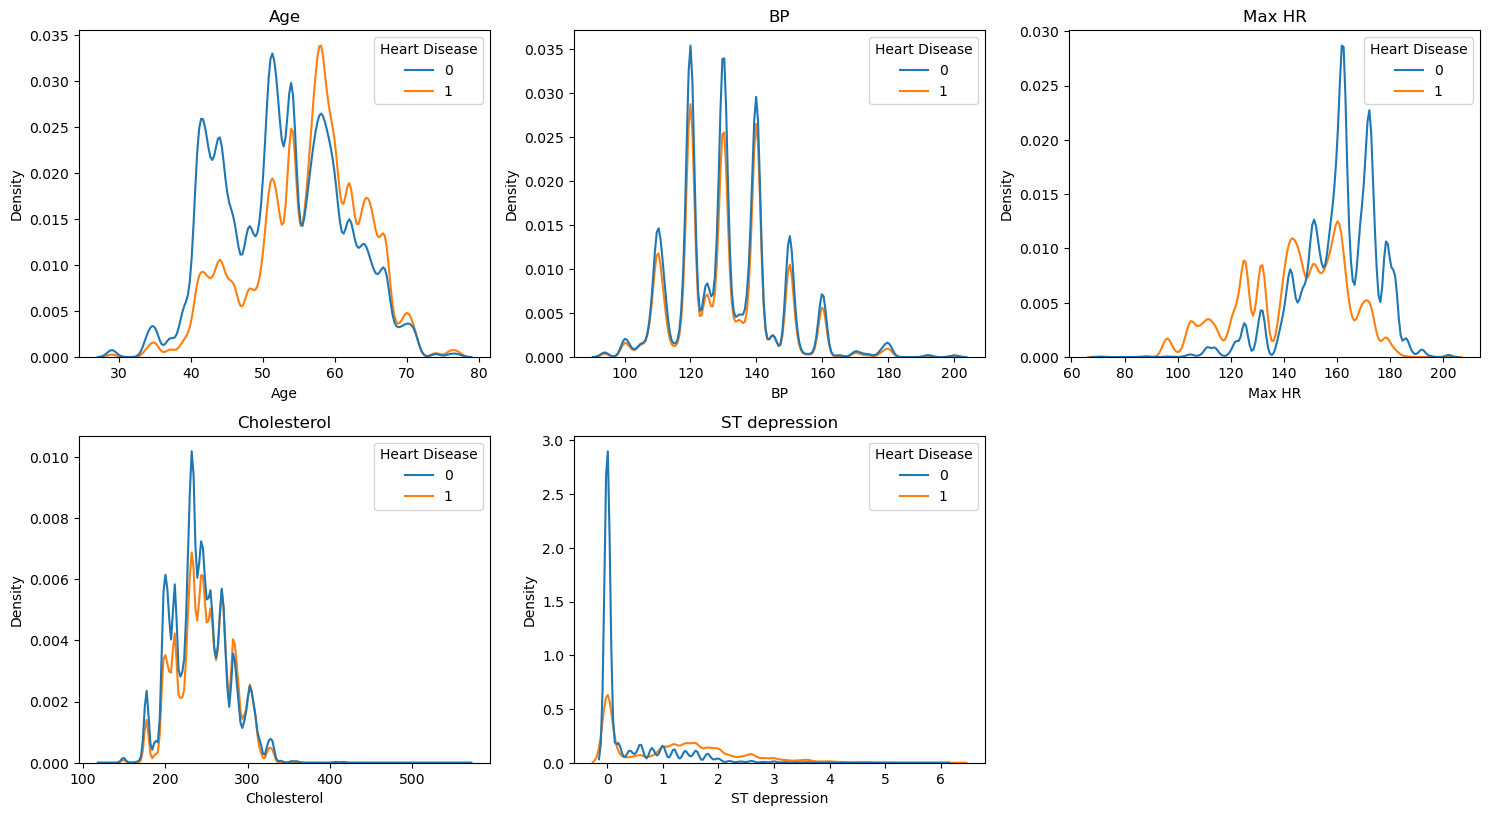

<Figure size 640x480 with 0 Axes>

In [15]:
X_columns = ["Age","BP","Max HR","Cholesterol","ST depression"]

rows, cols = 5, 3
plt.figure(figsize=(15, 20))

for i, col in enumerate(X_columns[:rows*cols]):
    plt.subplot(rows, cols, i + 1)
    sns.kdeplot(
        data=train,
        x=col,
        hue="Heart Disease",
    )
    plt.title(col)

plt.tight_layout()
plt.show()
plt.savefig("kde_plot.png")

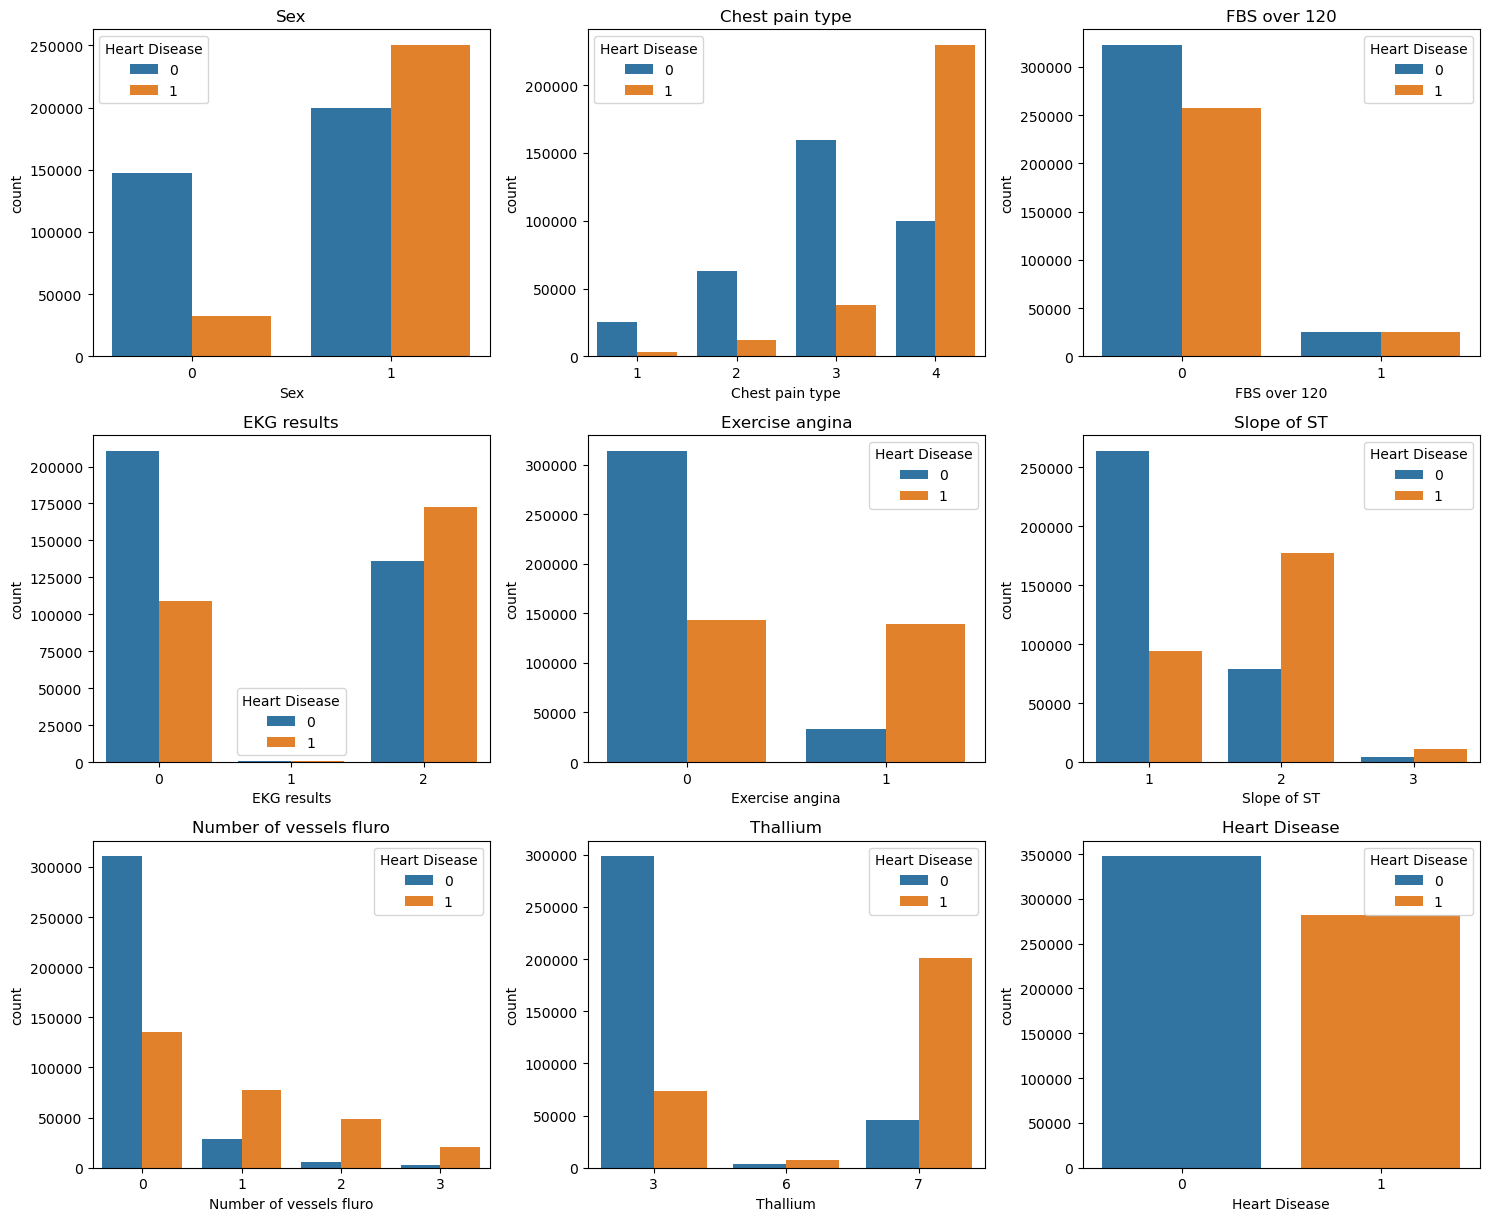

<Figure size 640x480 with 0 Axes>

In [16]:
X_columns = train.drop(columns=["Age","BP","Max HR","Cholesterol","ST depression"]).columns

rows, cols = 5, 3
plt.figure(figsize=(15, 20))

for i, col in enumerate(X_columns[:rows*cols]):
    plt.subplot(rows, cols, i + 1)
    sns.countplot(
        data=train,
        x=col,
        hue="Heart Disease",
    )
    plt.title(col)

plt.tight_layout()
plt.show()
plt.savefig("countplot.png")

# Insights
1. persion with 4 th type of chest pain have high chance of heart desiease - high
2. number of vessels fluro -  high
3. Males (1) appear to have more heart disease cases than females (0) - medium
4. fbs - Distribution looks similar for both groups - low
5. Some EKG result categories show higher heart disease presence. - medium
6. If exercise-induced angina = 1, heart disease presence increases significantly. - high
7. Certain ST slope categories strongly correlate with heart disease presence. - high
8. thallium categforis strongly assosiated with heat desease - high

In [8]:
train["Heart Disease"] = train["Heart Disease"].map({
    "Absence": 0,
    "Presence": 1
})


In [9]:
train[train["Heart Disease"] == 1]["Age"].shape

(282454,)

In [10]:
train[train["Heart Disease"] == 1]["Age"].std()


7.768723022924213

In [11]:
train["Heart Disease"].value_counts(normalize=True)


Heart Disease
0    0.55166
1    0.44834
Name: proportion, dtype: float64

data is not tha much imbalnace diffrent is only about 10 %

In [12]:
train.groupby("Heart Disease")[["Age","BP","Max HR","Cholesterol","ST depression"]].mean()


,Age,BP,Max HR,Cholesterol,ST depression
Heart Disease,,,,,
0,52.558093,130.567381,160.415105,242.499102,0.347808
1,56.079114,130.411366,143.467372,248.103585,1.169104


| Feature       | No Disease (0) | Disease (1) | Difference      | Insight Strength |
| ------------- | -------------- | ----------- | --------------- | ---------------- |
| Age           | 52.56          | 56.08       | **+3.52 years** | 🟡 Moderate      |
| BP            | 130.57         | 130.41      | ~0              | 🔴 Very Weak     |
| Max HR        | 160.41         | 143.47      | **−16.94 bpm**  | 🟢 Strong        |
| Cholesterol   | 242.50         | 248.10      | +5.6            | 🟡 Weak          |
| ST depression | 0.35           | 1.17        | **+0.82**       | 🟢 Very Strong   |


In [28]:

num_cols = ["Age","BP","Max HR","Cholesterol","ST depression"]

cat_cols = train.drop(columns=num_cols + ["Heart Disease"]).columns

for col in cat_cols:
    print("\n", col)
    print(pd.crosstab(train[col], train["Heart Disease"], normalize="index"))



 Sex
Heart Disease         0         1
Sex                              
0              0.821236  0.178764
1              0.444067  0.555933

 Chest pain type
Heart Disease           0         1
Chest pain type                    
1                0.891931  0.108069
2                0.837819  0.162181
3                0.809335  0.190665
4                0.302522  0.697478

 FBS over 120
Heart Disease         0         1
FBS over 120                     
0              0.556583  0.443417
1              0.495039  0.504961

 EKG results
Heart Disease         0         1
EKG results                      
0              0.658502  0.341498
1              0.639939  0.360061
2              0.440440  0.559560

 Exercise angina
Heart Disease           0         1
Exercise angina                    
0                0.686567  0.313433
1                0.193712  0.806288

 Slope of ST
Heart Disease         0         1
Slope of ST                      
1              0.737743  0.262257
2          

<Axes: >

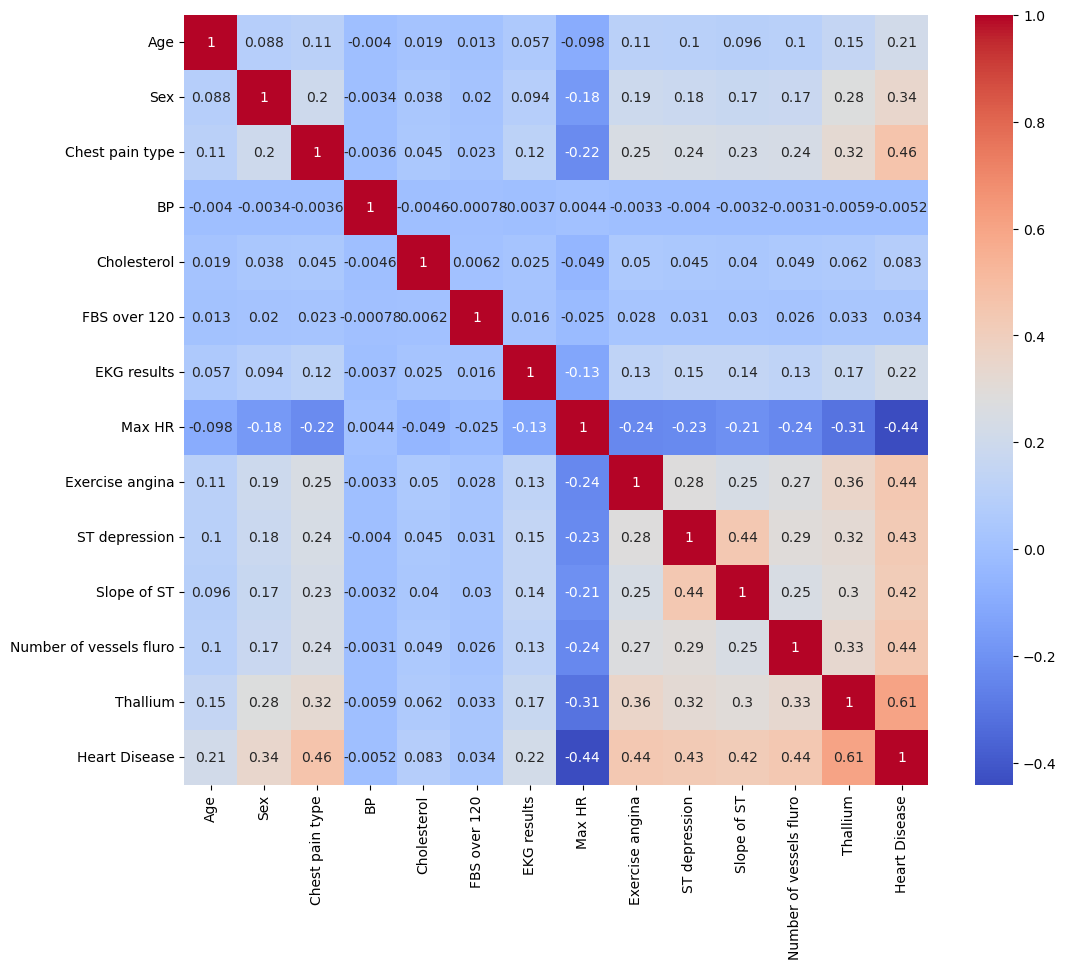

In [27]:
plt.figure(figsize=(12,10))
cor = train.corr()
sns.heatmap(cor, cmap="coolwarm", annot=True)

from all above it can be conform that BP, FBS over 120 and cholestrol are week feature 

# Trying model with all features 

In [34]:
# instend of label encoding we need to onehot encode the features
train_onehot = pd.get_dummies(train, columns=cat_cols, drop_first=True).astype(int)
train_onehot.head()

,Age,BP,Cholesterol,Max HR,ST depression,Heart Disease,Sex_1,Chest pain type_2,Chest pain type_3,Chest pain type_4,...,EKG results_1,EKG results_2,Exercise angina_1,Slope of ST_2,Slope of ST_3,Number of vessels fluro_1,Number of vessels fluro_2,Number of vessels fluro_3,Thallium_6,Thallium_7
id,,,,,,,,,,,,,,,,,,,,,
0,58,152,239,158,3,1,1,0,0,1,...,0,0,1,1,0,0,1,0,0,1
1,52,125,325,171,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,56,160,188,151,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,44,134,229,150,1,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
4,58,140,234,125,3,1,1,0,0,1,...,0,1,1,1,0,0,0,1,0,0


In [36]:
# Noramlize features 

num_cols = ["Age","BP","Max HR","Cholesterol","ST depression"]

scaler = StandardScaler()

train_onehot[num_cols] = scaler.fit_transform(train_onehot[num_cols])

In [39]:
# split in in x and y
X = train_onehot.drop(columns=["Heart Disease"])
y = train_onehot["Heart Disease"]

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

log_model = LogisticRegression(max_iter=1000)
rf_model = RandomForestClassifier()
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss")

In [41]:
from sklearn.model_selection import cross_val_score
scoring="roc_auc"
log_scores = cross_val_score(log_model, X, y, cv=5, scoring="roc_auc")
rf_scores = cross_val_score(rf_model, X, y, cv=5, scoring="roc_auc")
xgb_scores = cross_val_score(xgb_model, X, y, cv=5, scoring="roc_auc")

print("Logistic ROC-AUC:", log_scores.mean())
print("Random Forest ROC-AUC:", rf_scores.mean())
print("XGBoost ROC-AUC:", xgb_scores.mean())

/home/mohsinkhan/.local/lib/python3.14/site-packages/xgboost/training.py:199: UserWarning: [03:54:33] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/mohsinkhan/.local/lib/python3.14/site-packages/xgboost/training.py:199: UserWarning: [03:54:34] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/mohsinkhan/.local/lib/python3.14/site-packages/xgboost/training.py:199: UserWarning: [03:54:35] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/mohsinkhan/.local/lib/python3.14/site-packages/xgboost/training.py:199: UserWarning: [03:54:36] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/mohsinkhan/.local/lib/python3.14/site-pack

Logistic ROC-AUC: 0.9529311078396198
Random Forest ROC-AUC: 0.9457511771753666
XGBoost ROC-AUC: 0.9547513557818222
